In [30]:
from tensorflow import keras

In [31]:
# 저장한 모델 불러오기 
model = keras.models.load_model('best-cnn-model.h5')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [33]:
conv_layer = model.layers[0]
conv_layer.weights[0].shape # 커널에 적용된 가중치

TensorShape([3, 3, 1, 32])

In [34]:
conv_layer.weights[1].shape # 필터마다 커널이 32개 (절편)

TensorShape([32])

In [35]:
'''
# 합성곱의 가중치와 위에서 훈련된 가중치의 차이

# 훈련되지 않은 합성곱 신경망
model_nonTraining = keras.Sequential()
model_nonTraining.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))
'''

"\n# 합성곱의 가중치와 위에서 훈련된 가중치의 차이\n\n# 훈련되지 않은 합성곱 신경망\nmodel_nonTraining = keras.Sequential()\nmodel_nonTraining.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',\n                                          padding='same', input_shape=(28,28,1)))\n"

# 특성맵 시각화

In [36]:
(x_train, y_train),(x_target,y_target) = keras.datasets.fashion_mnist.load_data()

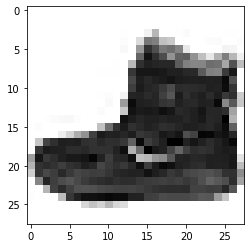

In [37]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray_r')
plt.show()

In [38]:
# 위의 샘플을 Conv2D 층이 만드는 특성맵을 출력
# 함수형 API
# 신경망 모델 사용할 때 Sequential 클래스를 사용 --> 층을 차례대로 쌓는데 모델을 사용
# 본격적인 딥러닝에서는 모델이 복잡해지므로 Sequential 클래스를 사용하기 힘듦
# 대안으로 나온 것이 --> 함수형 API

# Sequential --> 함수형 API

### 사용 방법 : Dense층이 2개인 완전연결 신경망을 함수형 API로 구현하기

In [57]:
# 밀집층 및 출력층 생성

# 1) 2차원으로 넣어준 뒤 Flatten 활용하여 차수 바꿔주기
# inputs = keras.Input(shape=(28,28))
# flatten = keras.layers.Flatten()
# dense1 = keras.layers.Dense(100, activation='relu')
# dense2 = keras.layers.Dense(10, activation='softmax')

# start = flatten(inputs)
# hidden = dense1(inputs)
# outputs = dense2(hidden)

inputs = keras.Input(shape=(28*28,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

hidden = dense1(inputs)
outputs = dense2(hidden)

# Sequential은 한꺼번에 구성한다면, 함수형 API는 따로 따로 구성할 수 있음

non_train_model = keras.Model(inputs, outputs)

In [58]:
# 어떤 특성맵을 시각화 할 때는 합성곡의 출력(Conv2D)이 필요하고,
# input에서는 모델의 입력을 얻을 수 있고 시각화는 output에서 얻을 수 있음

In [59]:
model.input # 모델 입력 정보

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_6_input')>

In [60]:
model.layers # 레이어 정보
# convolutional --> 합성곡 정보

In [61]:
# 첫 번째 층에 대한 합성곡 필요 **
model.layers[0] # inputLayer

In [62]:
model.layers[0].output # 합성곡의 출력 정보 (인덱스값이 0 이기 때문에 input의 입력 정보와 동일)
# Sequential 한 데이터는 구조를 변경할 수 없으나 함수형 API는 가능

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_6')>

In [63]:
model.layers[1].output # 합성곡의 두 번째 출력 정보

<KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d_4')>

In [64]:
concat_model = keras.Model(model.input, model.layers[1].output) # 입력층과 출력층

In [65]:
temp_input = x_train[:1].reshape(-1,28,28,1) / 255.0

In [66]:
concat_model = keras.Model(model.input, model.layers[0].output)

In [69]:
temp_input = x_train[:1].reshape(-1,28,28,1) / 255.0 # x_train의 첫번째 데이터를
feature_map = concat_model.predict(temp_input) # 32번씩 필터를 적용한 
x_train[:1].shape, feature_map.shape # 결과값

((1, 28, 28), (1, 28, 28, 32))

In [68]:
# 첫 번째 이미지(신발 : (28, 28) )을 --> 32개의 특성으로 늘려줌
# 개수는 늘어나되, 가로*세로 길이에는 영향을 주지 않게 padding 값을 줌
#   --> 즉 28*28의 이미지 하나를 32번씩 필터를 적용하여 전체 이미지를 특성맵을 만들어 준 것 (총 32개)
# 크기는 그대로로, 개수만 32개로 늘리고, 또 64개로 늘리는 과정을 거쳐 원하는 대로 재구성 할 수 있도록 해줌

# 예를 들어 신발 이미지를 정면 뿐만 아니라 모든 각도를 경우의 수로 여러 장을 만들어 주어 자신을 복사해 내는 것

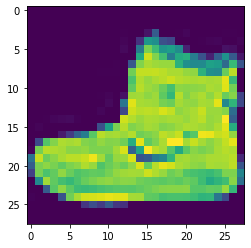

In [70]:
plt.imshow(x_train[:1][0])

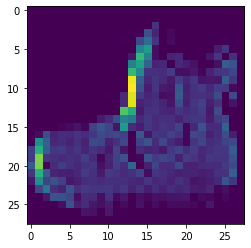

In [73]:
feature_map[0,:,:,0].shape
plt.imshow(feature_map[0,:,:,2]) # 첫번째 이미지의 두번째 특성

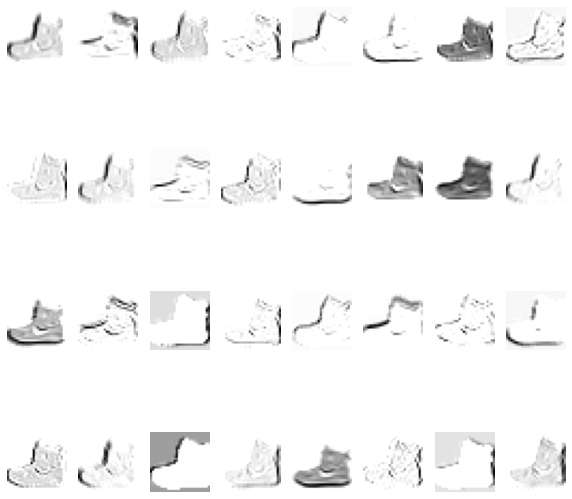

In [79]:
fig, axs = plt.subplots(4, 8, figsize=(10,10)) # 행 : 4    열 : 8

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [80]:
# 64번째 합성곱
concat_model = keras.Model(model.input, model.layers[2].output)

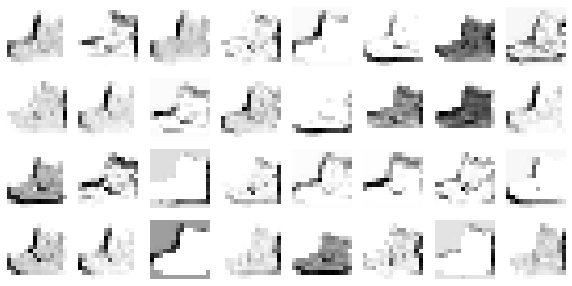

In [81]:
concat_model = keras.Model(model.input, model.layers[1].output) # 풀링한 두번재 합성곱 데이터 (14*14)
temp_input = x_train[:1].reshape(-1,28,28,1) / 255.0 # x_train의 첫번째 데이터를
feature_map = concat_model.predict(temp_input) # 32번씩 필터를 적용한 
x_train[:1].shape, feature_map.shape # 결과값

fig, axs = plt.subplots(4, 8, figsize=(10,5)) # 행 : 4    열 : 8

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

# 마치 엄청 확대한 것처럼 보임

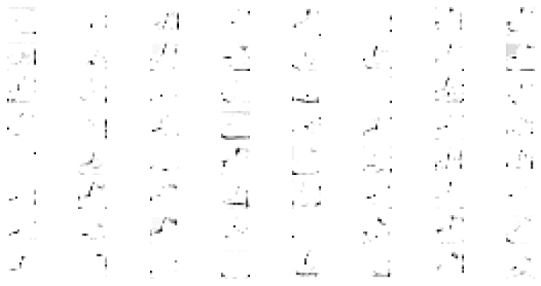

In [83]:
concat_model = keras.Model(model.input, model.layers[2].output) # 풀링한 두번재 합성곱 데이터 (14*14)
temp_input = x_train[:1].reshape(-1,28,28,1) / 255.0 # x_train의 첫번째 데이터를
feature_map = concat_model.predict(temp_input) # 32번씩 필터를 적용한 
x_train[:1].shape, feature_map.shape # 결과값

fig, axs = plt.subplots(8, 8, figsize=(10,5)) # 행 : 4    열 : 8

for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_map[0,:,:,i*8+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

# 중요하다고 생각되는 특성만 확대하여 출력한 결과